<a href="https://colab.research.google.com/github/Sakshi-2/Accidents/blob/main/Flight_delay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**FLIGHT DELAY**

Importing all the libraries 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

Loading in the dataset

In [ ]:
url='https://raw.githubusercontent.com/Sakshi-2/DAV-team/main/flight_delays_train.csv'
df=pd.read_csv(url)

**EDA**

Getting the dimensions of the data.

In [ ]:
df.shape

(100000, 9)

Taking a brief look at how the columns and rows look like

In [ ]:
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


Checking for null values

In [ ]:
df.isnull().sum().any()

False

In [ ]:
df.isnull().sum()

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
UniqueCarrier        0
Origin               0
Dest                 0
Distance             0
dep_delayed_15min    0
dtype: int64

Statistical analysis of the data

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DepTime,100000.0,1341.52388,476.378445,1.0,931.0,1330.0,1733.0,2534.0
Distance,100000.0,729.39716,574.616860,30.0,317.0,575.0,957.0,4962.0


In [ ]:
df['dep_delayed_15min'].value_counts()

N    80956
Y    19044
Name: dep_delayed_15min, dtype: int64

There are lesser flights that are delayed than the ones that are not delayed.

Changing the Y and N in the output data as 1 and 0.

In [ ]:
df['dep_delayed_15min'] = np.where(df['dep_delayed_15min'] == 'N', 0, 1)

In [ ]:
df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,0
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,0
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,0
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,0
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,1
...,...,...,...,...,...,...,...,...,...
99995,c-5,c-4,c-3,1618,OO,SFO,RDD,199,0
99996,c-1,c-18,c-3,804,CO,EWR,DAB,884,0
99997,c-1,c-24,c-2,1901,NW,DTW,IAH,1076,0
99998,c-4,c-27,c-4,1515,MQ,DFW,GGG,140,0


In [ ]:
# adding an index to the dataset
df['index'] = np.arange(len(df))

In [ ]:
#removing characters from string
df['Month'] = df['Month'].str.extract('(\d+)', expand=False)
df['DayofMonth'] = df['DayofMonth'].str.extract('(\d+)', expand=False)
df['DayOfWeek'] = df['DayOfWeek'].str.extract('(\d+)', expand=False)

In [ ]:
#converting strings to int
df['Month'] = df['Month'].astype(int)
df['DayofMonth'] = df['DayofMonth'].astype(int)
df['DayOfWeek'] = df['DayOfWeek'].astype(int)
df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,index
0,8,21,7,1934,AA,ATL,DFW,732,0,0
1,4,20,3,1548,US,PIT,MCO,834,0,1
2,9,2,5,1422,XE,RDU,CLE,416,0,2
3,11,25,6,1015,OO,DEN,MEM,872,0,3
4,10,7,6,1828,WN,MDW,OMA,423,1,4
...,...,...,...,...,...,...,...,...,...,...
99995,5,4,3,1618,OO,SFO,RDD,199,0,99995
99996,1,18,3,804,CO,EWR,DAB,884,0,99996
99997,1,24,2,1901,NW,DTW,IAH,1076,0,99997
99998,4,27,4,1515,MQ,DFW,GGG,140,0,99998


In [ ]:
#moving the index to the front
index = df['index']
df.drop(labels=['index'], axis=1,inplace = True)
df.insert(0, 'index', index)
df

,index,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,0,8,21,7,1934,AA,ATL,DFW,732,0
1,1,4,20,3,1548,US,PIT,MCO,834,0
2,2,9,2,5,1422,XE,RDU,CLE,416,0
3,3,11,25,6,1015,OO,DEN,MEM,872,0
4,4,10,7,6,1828,WN,MDW,OMA,423,1
...,...,...,...,...,...,...,...,...,...,...
99995,99995,5,4,3,1618,OO,SFO,RDD,199,0
99996,99996,1,18,3,804,CO,EWR,DAB,884,0
99997,99997,1,24,2,1901,NW,DTW,IAH,1076,0
99998,99998,4,27,4,1515,MQ,DFW,GGG,140,0


In [ ]:
print("There are {} unique origin city".format(df['Origin'].nunique()))

There are 289 unique origin city


In [ ]:
print("There are {} unique destination city".format(df['Dest'].nunique()))

There are 289 unique destination city


In [ ]:
df.Origin.value_counts().mean()

346.02076124567475

In [ ]:
print(df.dtypes)

index                 int64
Month                 int64
DayofMonth            int64
DayOfWeek             int64
DepTime               int64
UniqueCarrier        object
Origin               object
Dest                 object
Distance              int64
dep_delayed_15min     int64
dtype: object


Unique airlines

In [ ]:
number_of_carriers=len(pd.unique(df['UniqueCarrier']))
print(number_of_carriers)

22


**VISUALIZATION OF DATA**

Total no. of flights per airline

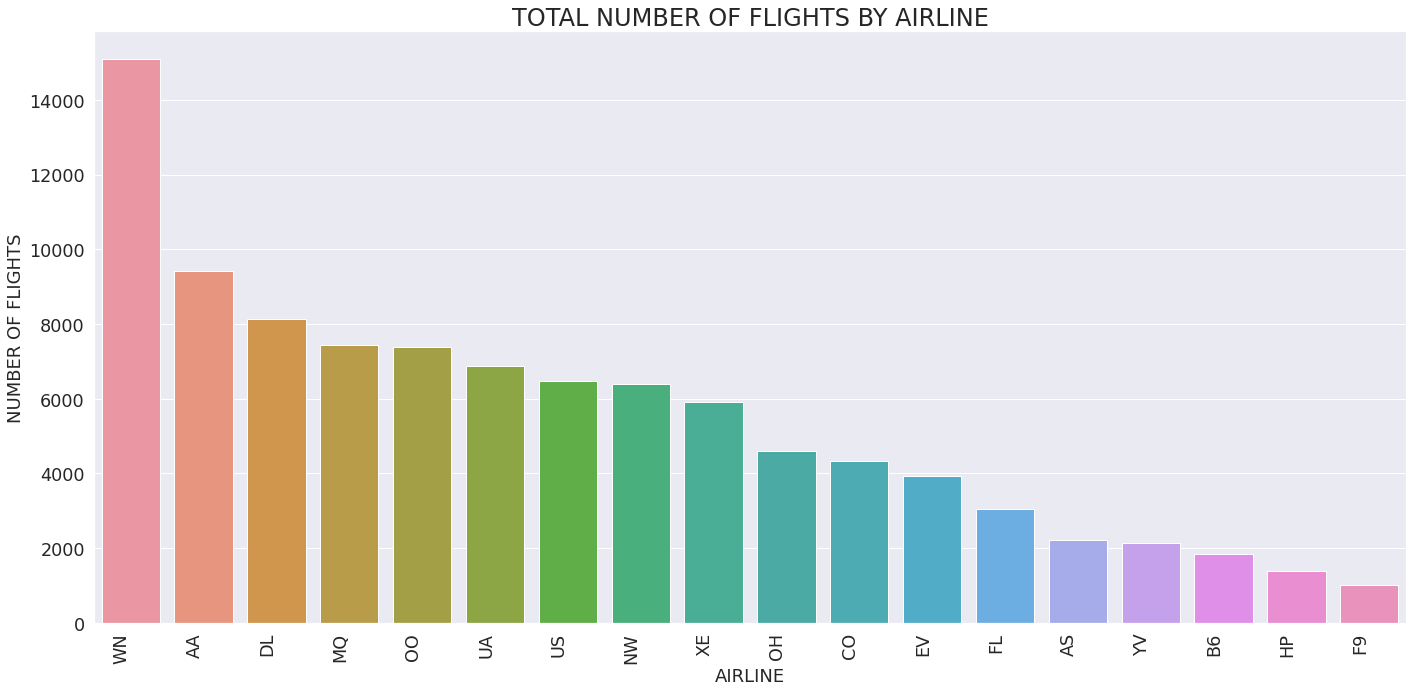

In [ ]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df['UniqueCarrier'], data=df, order=df['UniqueCarrier'].value_counts().iloc[0:18].index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('TOTAL NUMBER OF FLIGHTS BY AIRLINE', fontsize=24)
plt.xlabel('AIRLINE', fontsize=18)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=18)
plt.tight_layout()
plt.show()

Distance and delayed

In [ ]:
df.UniqueCarrier.value_counts()

WN    15082
AA     9418
DL     8128
MQ     7443
OO     7390
UA     6876
US     6482
NW     6403
XE     5901
OH     4594
CO     4334
EV     3930
FL     3039
AS     2222
YV     2128
B6     1838
HP     1378
F9     1006
DH      966
HA      762
TZ      446
AQ      234
Name: UniqueCarrier, dtype: int64

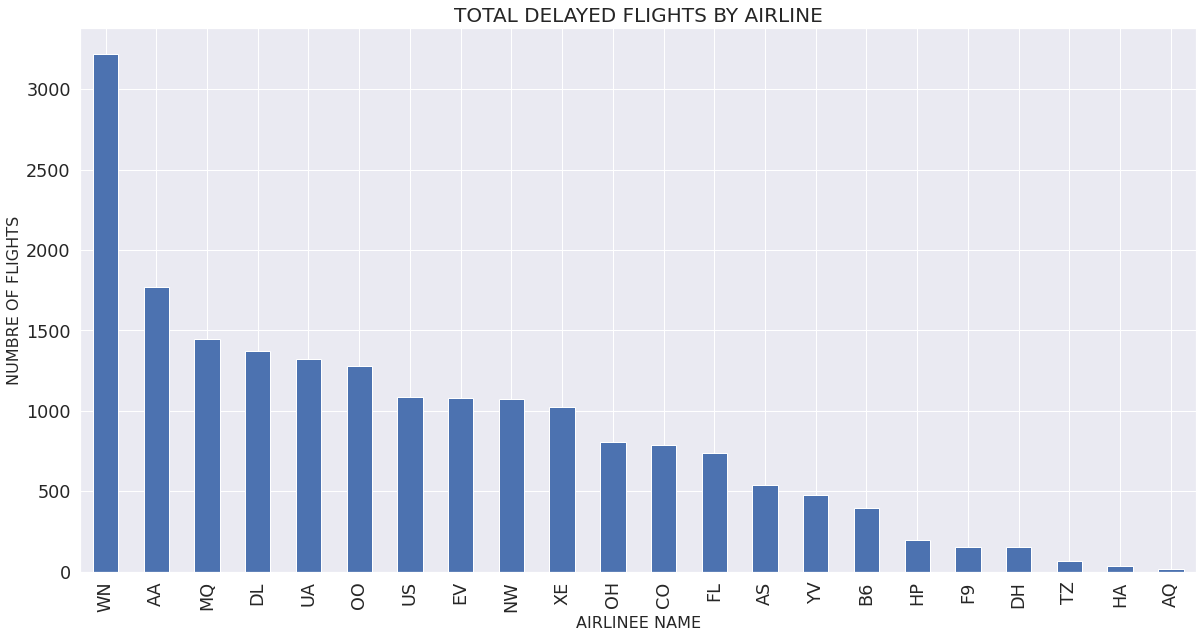

In [ ]:
plt.figure(figsize=(20, 10))
df.groupby('UniqueCarrier').dep_delayed_15min.sum().sort_values(ascending=False).plot.bar()
plt.title('TOTAL DELAYED FLIGHTS BY AIRLINE', fontsize=20)
plt.xlabel('AIRLINEE NAME', fontsize=16)
plt.ylabel('NUMBRE OF FLIGHTS', fontsize=16)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

In [ ]:
df.dep_delayed_15min.value_counts(normalize=True)

0    0.80956
1    0.19044
Name: dep_delayed_15min, dtype: float64

In [ ]:
# Creating the new dataframe with the columns of my interest
df_PFD = df[['UniqueCarrier', 'dep_delayed_15min']]
df_PFD.head()

,UniqueCarrier,dep_delayed_15min
0,AA,0
1,US,0
2,XE,0
3,OO,0
4,WN,1


In [ ]:
df_PFD.shape

(100000, 2)

In [ ]:
df_PFD.dep_delayed_15min.value_counts()

0    80956
1    19044
Name: dep_delayed_15min, dtype: int64

In [ ]:
# Create another dataframe (test_1) grouping the airline names and adding all the FLIGHT_STATUS values
# This way you will obtain all the delayed flights
test_1 = df_PFD.groupby(['UniqueCarrier']).sum().reset_index()

# Create another dataframe (test_2) from the value_counts directly so that it has all the flights added per airline
# Rename the axis to OP_CARRIER and reset_index to TOTAL_FLIGHTS
test_2 = df.UniqueCarrier.value_counts().rename_axis('UniqueCarrier').reset_index(name='TOTAL_FLIGHTS')

# Merge the two dataframes (test_1 and test_2) using the OP_CARRIER as the common column
df_fp = pd.merge(test_1, test_2, on='UniqueCarrier')

# Create a new column that will represent the percentage of delay flights
df_fp['PERCENTAGE_DELAYED'] = round((df_fp['dep_delayed_15min']*100)/df_fp['TOTAL_FLIGHTS'], 2)
df_fp.rename({'dep_delayed_15min': 'DELAYED_FLIGHTS'}, axis=1, inplace=True)

# Display the entire dataframe
df_fp.head(20)

,UniqueCarrier,DELAYED_FLIGHTS,TOTAL_FLIGHTS,PERCENTAGE_DELAYED
0,AA,1770,9418,18.79
1,AQ,18,234,7.69
2,AS,541,2222,24.35
3,B6,393,1838,21.38
4,CO,788,4334,18.18
5,DH,156,966,16.15
6,DL,1373,8128,16.89
7,EV,1082,3930,27.53
8,F9,156,1006,15.51
9,FL,736,3039,24.22


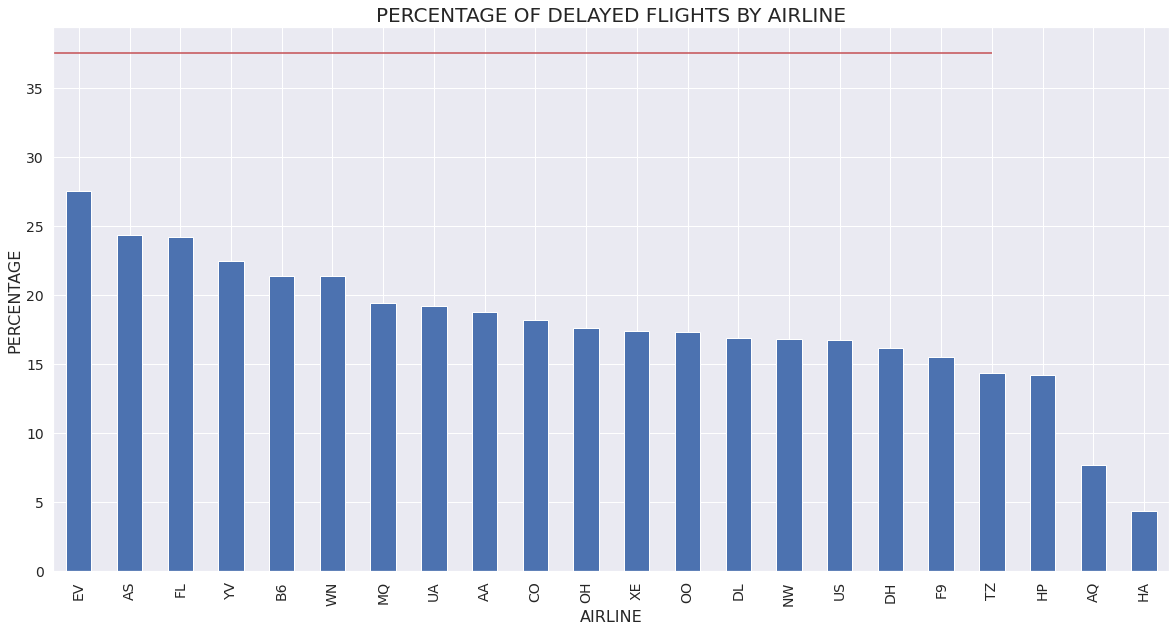

In [ ]:
# Plot with the 37.52% threshold value as a horizontal red line
plt.figure(figsize=(20, 10))
df_fp.groupby('UniqueCarrier').PERCENTAGE_DELAYED.sum().sort_values(ascending=False).plot.bar(fontsize=14)
plt.hlines(y=37.52, xmin=-1, xmax=18, colors='r', linestyles='solid', label='cutoff')
plt.title('PERCENTAGE OF DELAYED FLIGHTS BY AIRLINE', fontsize=20)
plt.xlabel('AIRLINE', fontsize=16)
plt.ylabel('PERCENTAGE', fontsize=16)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.show()

In [ ]:
df.head(1)

,index,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,0,8,21,7,1934,AA,ATL,DFW,732,0


Most common destinations

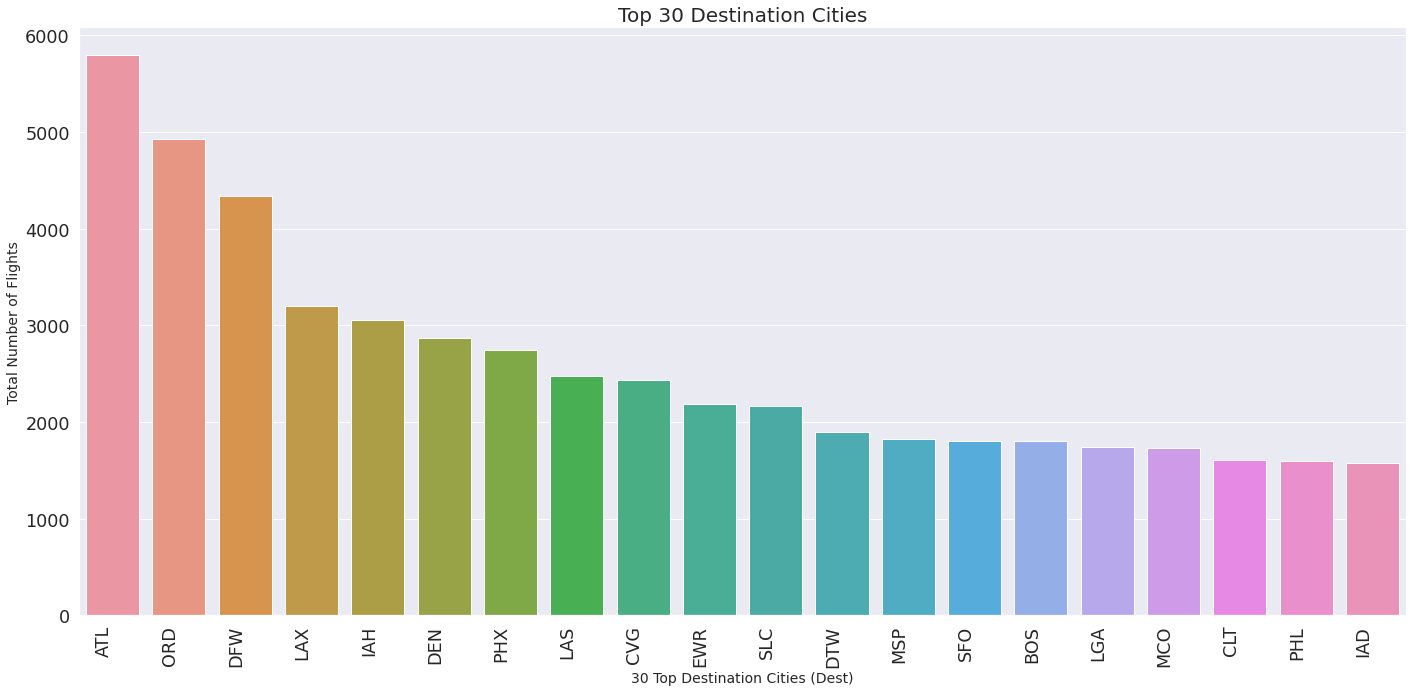

In [ ]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df['Dest'], data=df, order=df['Dest'].value_counts().iloc[0:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('Top 30 Destination Cities', fontsize=20)
plt.xlabel('30 Top Destination Cities (Dest)', fontsize=14)
plt.ylabel('Total Number of Flights', fontsize=14)
plt.tight_layout()
plt.show()

Worse and best days to travel based on flight delays

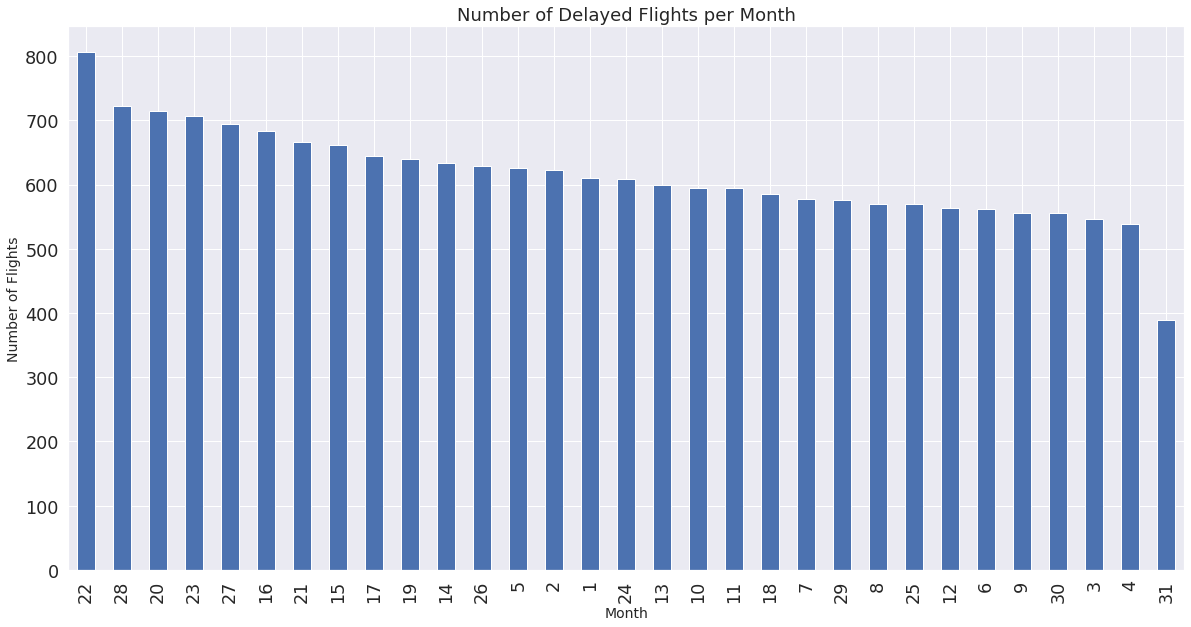

In [ ]:
plt.figure(figsize=(20, 10))
df.groupby('DayofMonth').dep_delayed_15min.sum().sort_values(ascending=False).plot.bar()
plt.title('Number of Delayed Flights per Month', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

**PRE-PROCESSING**

In [ ]:
X = df.drop(['dep_delayed_15min'], axis=1)
y = df['dep_delayed_15min']


In [ ]:
df.columns

Index(['index', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'Origin', 'Dest', 'Distance', 'dep_delayed_15min'],
      dtype='object')

In [ ]:
y = y.astype(float)

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((75000, 9), (25000, 9))

In [ ]:
X_train.dtypes

index             int64
Month             int64
DayofMonth        int64
DayOfWeek         int64
DepTime           int64
UniqueCarrier    object
Origin           object
Dest             object
Distance          int64
dtype: object

In [ ]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['UniqueCarrier', 'Origin', 'Dest']

In [ ]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['index', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'Distance']

In [ ]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

UniqueCarrier    0.0
Origin           0.0
Dest             0.0
dtype: float64

In [ ]:
X_test[categorical].isnull().sum()


UniqueCarrier    0
Origin           0
Dest             0
dtype: int64

Encode categorical variables

In [ ]:
categorical

['UniqueCarrier', 'Origin', 'Dest']

In [ ]:
X_train[categorical].head()

,UniqueCarrier,Origin,Dest
56402,AA,JAX,DFW
51733,WN,BWI,PVD
30793,EV,ATL,ILM
9190,MQ,ORD,SGF
41076,WN,HOU,DAL


In [ ]:
pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import category_encoders as ce

In [ ]:
encoder = ce.OneHotEncoder(cols=['UniqueCarrier', 'Origin', 'Dest'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [ ]:
X_train.head(1)

,index,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier_1,UniqueCarrier_2,UniqueCarrier_3,UniqueCarrier_4,UniqueCarrier_5,...,Dest_280,Dest_281,Dest_282,Dest_283,Dest_284,Dest_285,Dest_286,Dest_287,Dest_288,Distance
56402,56402,9,13,3,1913,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,919


In [ ]:
X_train.shape

(75000, 603)

In [ ]:
cols = X_train.columns

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

**Model Training**

Gaussian NB

In [ ]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(X_test)

y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.2409


In [ ]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.2437


Logistic Regression

In [ ]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
# probability of getting output as 0 - no rain

logreg.predict_proba(X_test)[:,0]

array([0.83748948, 0.81354885, 0.92194233, ..., 0.77066232, 0.85846497,
       0.89921091])

In [ ]:
# probability of getting output as 1 - rain

y_1 = logreg.predict_proba(X_test)[:,1]

In [ ]:
y_1

array([0.16251052, 0.18645115, 0.07805767, ..., 0.22933768, 0.14153503,
       0.10078909])

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8089


In [ ]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array([0., 0., 1., ..., 0., 0., 0.])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8120


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8120
Test set score: 0.8089


The training-set accuracy score is 0.8143 while the test-set accuracy to be 0.8115. These two values are quite comparable. So, there is no question of overfitting.

In [ ]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.8123
Test set score: 0.8084


The score is so close so it looks like a case of underfitting.

In [ ]:
# fit the Logsitic Regression model with C=001

# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.8109
Test set score: 0.8095


In [ ]:
# check class distribution in test set

y_test.value_counts()

0.0    20210
1.0     4790
Name: dep_delayed_15min, dtype: int64

In [ ]:
# check null accuracy score

null_accuracy = (22067/(22067+6372))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7759


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.81      0.99      0.89     20210
         1.0       0.52      0.04      0.07      4790

    accuracy                           0.81     25000
   macro avg       0.67      0.51      0.48     25000
weighted avg       0.76      0.81      0.74     25000



In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[20048   162]
 [ 4615   175]]

True Positives(TP) =  20048

True Negatives(TN) =  175

False Positives(FP) =  162

False Negatives(FN) =  4615


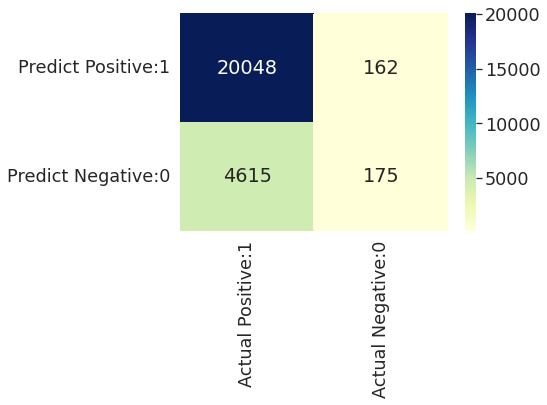

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.81      0.99      0.89     20210
         1.0       0.52      0.04      0.07      4790

    accuracy                           0.81     25000
   macro avg       0.67      0.51      0.48     25000
weighted avg       0.76      0.81      0.74     25000



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8089


Precision

In [ ]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9920


Recall

In [ ]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8129


True Positive Rate

In [ ]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8129


False Positive Rate

In [ ]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.4807


Specificity

In [ ]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.5193


ROC-AUC

In [ ]:
y_pred1 = logreg.predict_proba(X_test)[:, 1]

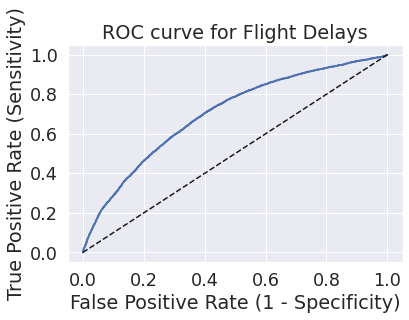

In [ ]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Flight Delays')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [ ]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.7021


In [ ]:
import warnings
warnings.filterwarnings("ignore")
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc').mean()

print(Cross_validated_ROC_AUC)
#print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

0.6951657331425862


In [ ]:
y_pred_test = logreg.predict(X_test)

y_pred_test.T

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
y_pred_test.T

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
X_test["dep_delay_15min"] = y_1
X_test["dep_delay_15min"]

,dep_delay_15min
0,0.162511
1,0.186451
2,0.078058
3,0.089410
4,0.119489
...,...
24995,0.216143
24996,0.082517
24997,0.229338
24998,0.141535


In [ ]:
X_test['index']

,index
0,0.121506
1,-0.752521
2,0.643567
3,0.798253
4,0.884940
...,...
24995,-0.438013
24996,0.502214
24997,-0.446807
24998,0.948521


In [ ]:
#y_prediction = logreg.predict(X_test)

X_test["dep_delay_15min"] = y_1
submission = X_test["dep_delay_15min"]

submission.to_csv("predictions.csv", index = False)

In [ ]:
X_train.shape

(75000, 603)

**DEEP LEARNING MODEL**

In [ ]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense


In [ ]:
vocab_size = 100000
embedding_dim=100
max_length = 600
trunc_type= 'post'
oov_tok=""

In [ ]:
import re
from tqdm import tqdm_notebook
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def clean_text(text, remove_stopwords = True):
    output = ""
    text = str(text).replace("\n", "")
    text = re.sub(r'[^\w\s]','',text).lower()
    if remove_stopwords:
        text = text.split(" ")
        for word in text:
            if word not in stopwords.words("english"):
                output = output + " " + word
    else:
        output = text
    return str(output.strip())[1:-3].replace("  ", " ")

In [ ]:
texts = [] 

for line in tqdm_notebook(X_train, total=600): 
    texts.append(clean_text(line))

  0%|          | 0/600 [00:00<?, ?it/s]

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(texts)

In [ ]:
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Vocabulary size:', len(word_index))

Vocabulary size: 13


In [ ]:
data = pad_sequences(sequences, padding = 'post', maxlen = max_length)

print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', y.shape)

Shape of data tensor: (603, 600)
Shape of label tensor: (100000,)


In [ ]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = y[indices]

In [ ]:
print('Tokenized sentences: \n', data[11])
print('One hot label: \n', labels[11])

Tokenized sentences: 
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2022-06-15 16:58:21--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-06-15 16:58:21--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-06-15 16:58:21--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.2’

glove

In [ ]:
!unzip glove*.zip

Archive:  glove.6B.zip
replace glove.6B.50d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
GLOVE_DIR = "glove/glove.6B."+str(embedding_dim)+"d.txt"

In [ ]:
embeddings_index = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
print('Loading GloVe from:', GLOVE_DIR,'...', end='')
for line in f:
    values = line.split()
    word = values[0]
    embeddings_index[word] = np.asarray(values[1:], dtype='float32')
f.close()
print("Done.\n Proceeding with Embedding Matrix...", end="")

embedding_matrix = np.random.random((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
print(" Completed!")

Loading GloVe from: glove/glove.6B.100d.txt ...Done.
 Proceeding with Embedding Matrix... Completed!


In [ ]:
from tensorflow.keras import regularizers, initializers, optimizers, callbacks
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

In [ ]:
sequence_input = Input(shape=(max_length,), dtype='int32')
embedding_layer = Embedding(len(word_index) + 1,
                           embedding_dim,
                           weights = [embedding_matrix],
                           input_length = max_length,
                           trainable=False,
                           name = 'embeddings')
embedded_sequences = embedding_layer(sequence_input)

In [ ]:
x = LSTM(60, return_sequences=True,name='lstm_layer')(embedded_sequences)
x = GlobalMaxPool1D()(x)
x = Dropout(0.1)(x)
x = Dense(50, activation="relu")(x)
x = Dropout(0.1)(x)
preds = Dense(6, activation="sigmoid")(x)

In [ ]:
def build_model():
    model = Sequential()

    model.add(Dense(64, activation='relu', input_shape=(76,)))
    model.add(Dense(64, activation='linear'))
    model.add(BatchNormalization())

    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='linear'))
    model.add(BatchNormalization())

    model.add(Dense(16, activation='relu'))
    model.add(Dense(16, activation='linear'))
    model.add(BatchNormalization())

    model.add(Dense(8, activation='relu'))
    model.add(Dense(8, activation='linear'))
    model.add(BatchNormalization())

    model.add(Dense(4, activation='relu'))
    model.add(Dense(4, activation='linear'))
    model.add(BatchNormalization())

    model.add(Dense(2, activation='relu'))
    model.add(Dense(2, activation='linear'))
    model.add(BatchNormalization())

    model.add(Dense(1, activation='linear'))

    return model

In [ ]:
model = build_model()

In [ ]:
model = Model(sequence_input, preds)
model.compile(loss = 'binary_crossentropy',
             optimizer='adam',
             metrics = ['accuracy'])
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 600)]             0         
                                                                 
 embeddings (Embedding)      (None, 600, 100)          1400      
                                                                 
 lstm_layer (LSTM)           (None, 600, 60)           38640     
                                                                 
 global_max_pooling1d_3 (Glo  (None, 60)               0         
 balMaxPooling1D)                                                
                                                                 
 dropout_6 (Dropout)         (None, 60)                0         
                                                                 
 dense_19 (Dense)            (None, 50)                3050      
                                                           